This notebook include the model development for concatenationg the ensemble model and LSTM model

In [1]:
import pandas as pd 
import numpy as np

In [20]:
original_df = pd.read_excel('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/SolarForecasting/Data/filterdSolarGenerationUOM.xlsx')

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
original_df['Adjusted_Generation'] =scaler.fit_transform(original_df[['Adjusted_Generation']])

In [40]:
data = pd.read_excel('Results_LSTM.xlsx')

In [41]:
data = data.dropna()

In [42]:
data = data.drop('Datetime',axis=1)

In [43]:
data['time'] = pd.date_range(start='2024-08-27 06:00:00', end='2025-04-01 22:00:00', freq='H')


/var/folders/9z/jhl761ys4zxdmlymdmcfs3jm0000gn/T/ipykernel_20764/3026315929.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['time'] = pd.date_range(start='2024-08-27 06:00:00', end='2025-04-01 22:00:00', freq='H')


In [44]:
data

,Predicted_Generation_LSTM,Predicted_Generation_rf,Actual_Generation,time
0,0.185409,0.000000,0.000000,2024-08-27 06:00:00
1,0.284666,0.000000,0.000000,2024-08-27 07:00:00
2,3.282054,3.651652,3.500873,2024-08-27 08:00:00
3,13.282102,11.941597,11.757605,2024-08-27 09:00:00
4,20.759627,19.268991,18.373552,2024-08-27 10:00:00
...,...,...,...,...
5220,4.510051,5.776850,5.989903,2025-04-01 18:00:00
5221,0.815031,0.993982,0.935114,2025-04-01 19:00:00
5222,0.208278,0.000000,0.000000,2025-04-01 20:00:00
5223,0.158897,0.000000,0.000000,2025-04-01 21:00:00


In [45]:
from sklearn.preprocessing import MinMaxScaler

actscaler = MinMaxScaler()
predrfScaler = MinMaxScaler()
predLstmScaler = MinMaxScaler()

data['Actual_Generation'] = actscaler.fit_transform(data[['Actual_Generation']])
data['Predicted_Generation_LSTM'] = predLstmScaler.fit_transform(data[['Predicted_Generation_LSTM']])
data['Predicted_Generation_rf'] = predrfScaler.fit_transform(data[['Predicted_Generation_rf']])

In [46]:
data

,Predicted_Generation_LSTM,Predicted_Generation_rf,Actual_Generation,time
0,0.007788,0.000000,0.000000,2024-08-27 06:00:00
1,0.010240,0.000000,0.000000,2024-08-27 07:00:00
2,0.084265,0.065347,0.060775,2024-08-27 08:00:00
3,0.331231,0.213696,0.204112,2024-08-27 09:00:00
4,0.515900,0.344820,0.318965,2024-08-27 10:00:00
...,...,...,...,...
5220,0.114592,0.103377,0.103985,2025-04-01 18:00:00
5221,0.023338,0.017787,0.016234,2025-04-01 19:00:00
5222,0.008353,0.000000,0.000000,2025-04-01 20:00:00
5223,0.007134,0.000000,0.000000,2025-04-01 21:00:00


In [49]:
X = data[['Predicted_Generation_LSTM', 'Predicted_Generation_rf']].values
y = data['Actual_Generation'].values.reshape(-1, 1)

In [65]:
dates = data['time'].values

In [66]:
X_train, X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
y_train, y_test = y[:int(len(X)*0.8)], y[int(len(X)*0.8):]
date_train, date_test = dates[:int(len(X)*0.8)], dates[int(len(X)*0.8):]

In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(1)  # output layer
])

model.compile(optimizer='adam', loss='mse')

In [91]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/50
236/236 [==============================] - 0s 603us/step - loss: 0.0014 - val_loss: 4.3621e-04
Epoch 2/50
236/236 [==============================] - 0s 369us/step - loss: 2.8836e-04 - val_loss: 4.2026e-04
Epoch 3/50
236/236 [==============================] - 0s 364us/step - loss: 2.7653e-04 - val_loss: 8.3792e-04
Epoch 4/50
236/236 [==============================] - 0s 364us/step - loss: 2.8044e-04 - val_loss: 4.3890e-04
Epoch 5/50
236/236 [==============================] - 0s 364us/step - loss: 2.8989e-04 - val_loss: 4.1969e-04
Epoch 6/50
236/236 [==============================] - 0s 368us/step - loss: 2.8195e-04 - val_loss: 4.0758e-04
Epoch 7/50
236/236 [==============================] - 0s 380us/step - loss: 2.8546e-04 - val_loss: 6.9195e-04
Epoch 8/50
236/236 [==============================] - 0s 382us/step - loss: 3.0729e-04 - val_loss: 4.1308e-04
Epoch 9/50
236/236 [==============================] - 0s 386us/step - loss: 2.7249e-04 - val_loss: 4.1624e-04
Epoch 10/50
23

In [102]:
from keras.models import load_model
model = load_model('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/SolarForecasting/Models/Notebooks/NNModel.h5')

33/33 [==============================] - 0s 245us/step


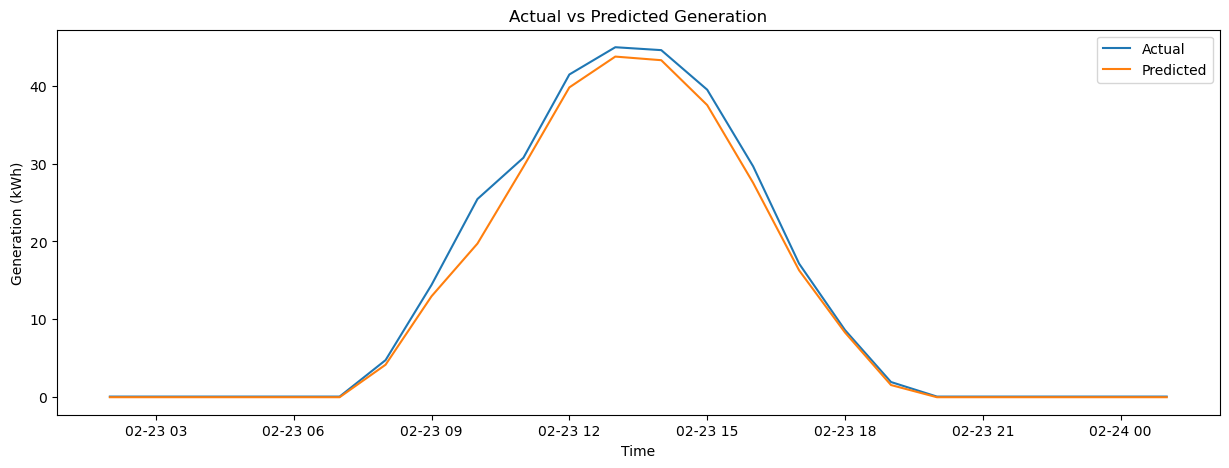

In [118]:
import matplotlib.pylab as plt
y_pred_scaled = model.predict(X_test)
y_pred = actscaler.inverse_transform(y_pred_scaled)
y_test_actual = actscaler.inverse_transform(y_test)

start_idx = 136
end_idx = 160
# 6. Plot results
plt.figure(figsize=(15, 5))
plt.plot(date_test[start_idx:end_idx],y_test_actual[start_idx:end_idx], label='Actual')
plt.plot(date_test[start_idx:end_idx],y_pred[start_idx:end_idx], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Generation')
plt.xlabel('Time')
plt.ylabel('Generation (kWh)')
plt.show()

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error

print("MSE:", mean_squared_error(y_test_actual, y_pred)),
print("MAE:", mean_absolute_error(y_test_actual, y_pred)), 
print("R2 Score:", r2_score(y_test_actual, y_pred))

MSE: 1.945564238210908
MAE: 0.7345058352223021
R2 Score: 0.9887445691831925


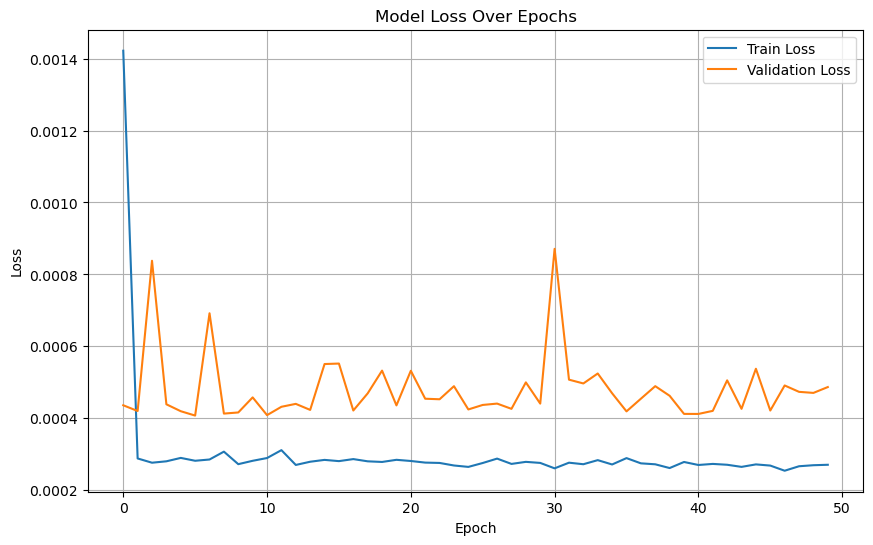

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

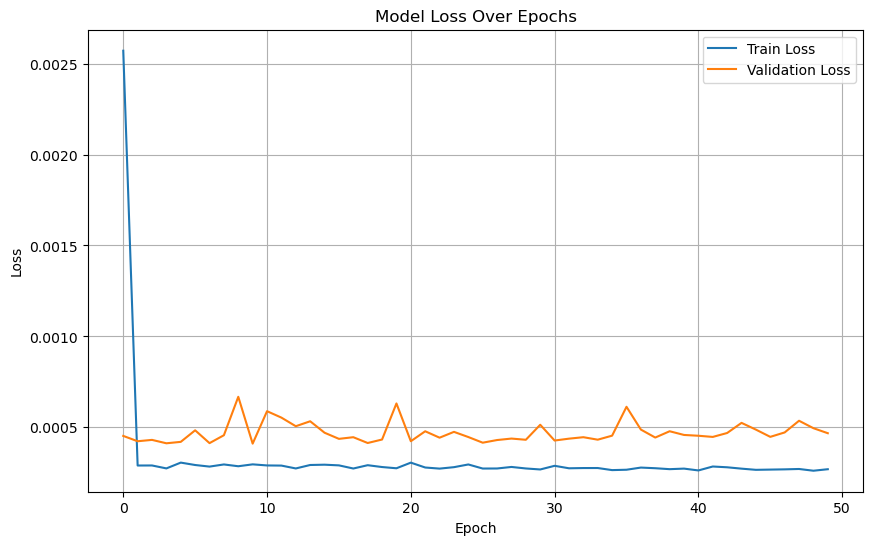

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [58]:
model.save('NNModel.h5')

/opt/miniconda3/envs/py310/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
